# TD de classification - Partie 1 - SVM

**Objectif de ce Notebook :**

L'objectif de ce notebook est de vous familiariser avec les **modèles de classification**. Nous allons voir le fonctionnement des machines à vecteurs de support (SVM) et comprendre comment elles peuvent être utilisées pour séparer des données de manière linéaire. En suivant ce notebook, vous serez capable de :

- Comprendre le concept de **vecteur de support** et son rôle dans les SVM
- Travailler avec des **données linéairement séparables** et identifier des cas où cette hypothèse est valable
- Construire et interpréter une **matrice de confusion** pour évaluer les performances d'un modèle de classification
- Diviser les données en **jeu de données d'entraînement** et **jeu de données de test** pour valider les performances du modèle
- Calculer et interpréter les métriques de **justesse (accuracy)**, **précision** et **rappel** pour évaluer les performances de votre modèle

**Mots-clés :**

- **SVM** : Machine à Vecteurs de Support
- **Vecteur de support**
- **Données linéairement séparables**
- **Matrice de confusion**
- **Jeu de données d'entraînement**
- **Jeu de données de test**
- **Justesse (accuracy)**
- **Précision**
- **Rappel**

**Ressources :**

- [Machine à vecteurs de support (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Séparation entre jeu de données d'entrainement et de test](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Matrice de confusion](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
- [Métriques de classification](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
___

▶️ Importer les **bibliothèques** nécessaires à l'activité

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
import imageio
from IPython.display import Image, display

▶️ **Exécuter le code** de la fonction d'affichage des graphiques

In [2]:
def afficher_graphique(
    X, y,
    const=None, coef0=None, coef1=None,
    svm=None, support=None,
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    # Données
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Classe 0')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Classe 1')
    # Droite de décision
    if const and coef0 and coef1 is not None:
        x_values = np.array([X[:, 0].min(), X[:, 0].max()])
        y_values = -(const + coef0 * x_values) / coef1
        ax.plot(x_values, y_values, 'g-', label='Droite de décision')
    # Vecteurs de support
    if svm and support is not None:
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['gray', 'gray', 'gray'])
        ax.scatter(support[:, 0], support[:, 1], s=100,
           facecolors='none', edgecolors='green', label='Vecteurs de support')        
    ax.set_xlabel("Caractéristique 1")
    ax.set_ylabel("Caractéristique 2")
    ax.legend()
    fig.suptitle("Entrainement d'un modèle de classification (SVM)", fontsize=20, y=1)
    plt.show()

▶️ **Importer et afficher les données** à classifier

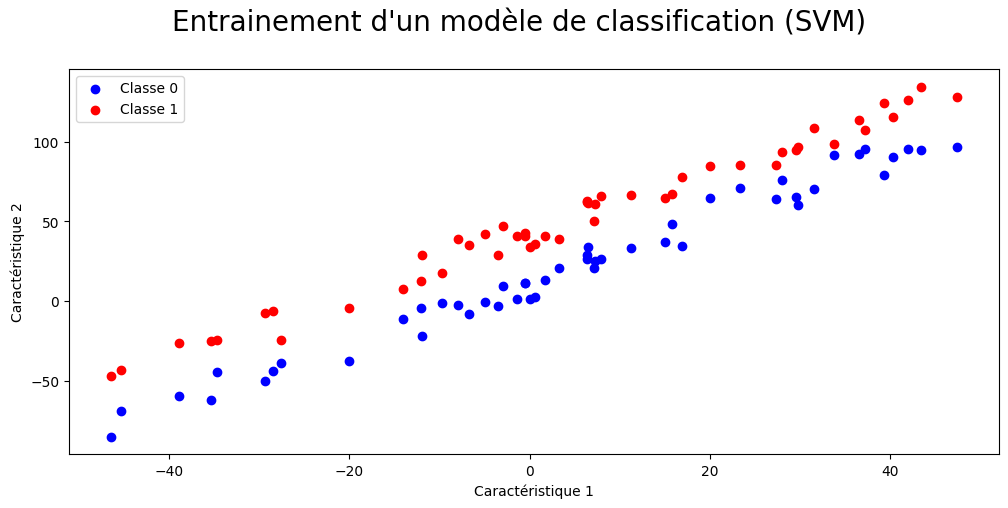

In [3]:
# Création du jeu de données
data = pd.read_csv('data_class_1.csv')
X = data.iloc[:, :2].to_numpy()
y = data.iloc[:, 2].to_numpy()
afficher_graphique(X, y)

## 💻 Code à compléter

**Objectif :**

Entrainer un modèle de **machine à vecteurs de support (SVM)** sur les données X,y.

**Etapes :**

- Choisir un **noyau linéaire** en utilisant le paramètre `kernel` de la fonction `SVC`
- **Entrainer** le modèle sur les **données X,y** à l'aide de la méthode `SVC().fit()`
- Afficher la **droite de décision** en passant à la fonction `afficher_graphique` les paramètres `const`, `coef0` et `coef1`

**Ressources à utiliser :**

Lien vers la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

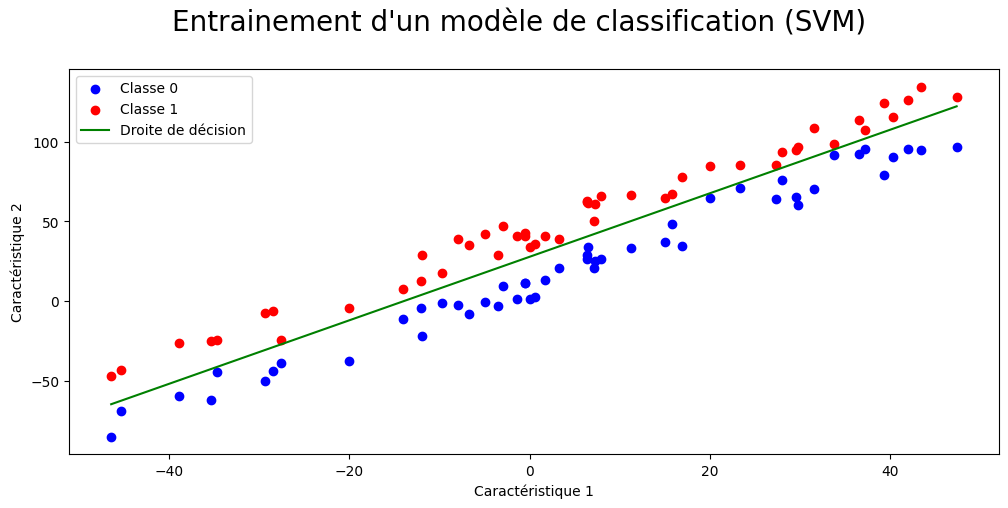

In [4]:
clf = SVC(kernel="linear").fit(X, y)
afficher_graphique(X, y, const=clf.intercept_, coef0=clf.coef_[0][0], coef1=clf.coef_[0][1])

## 💻 Code à compléter

**Objectif :**

Afficher les **vecteurs de support**

**Etapes :**

- **Afficher les coordonnées** des vecteurs de support
- Afficher les **vecteurs de support** en passant à la fonction `afficher_graphique` les paramètres `svm` (modèle entrainé) et `support` (coordonnées des vecteurs de support).

**Ressources à utiliser :**

Lien vers la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [5]:
print(clf.support_vectors_)

[[ 20.03453263  64.91536555]
 [ 27.39879994  85.05385086]
 [-27.6559185  -24.53064794]]


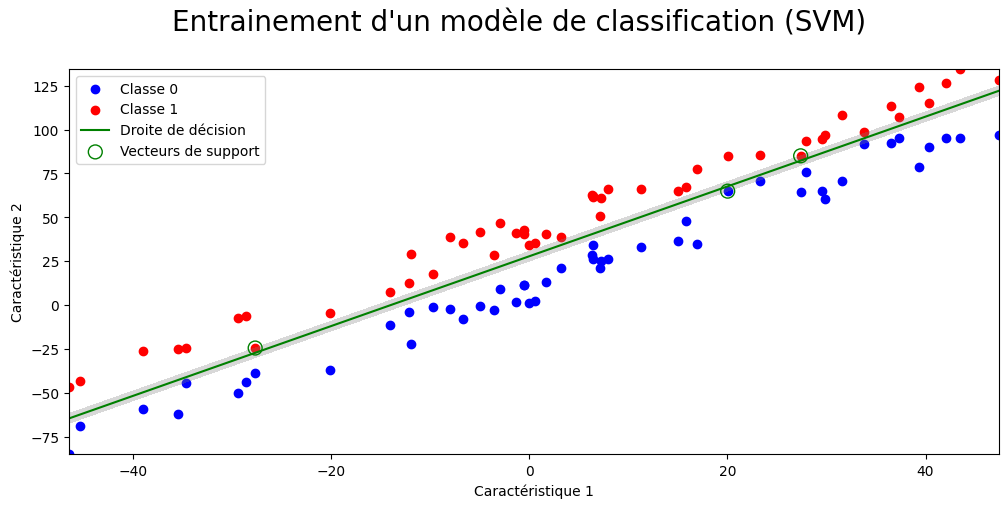

In [6]:
afficher_graphique(
    X, y,
    const=clf.intercept_, coef0=clf.coef_[0][0], coef1=clf.coef_[0][1],
    svm=clf, support=clf.support_vectors_,
)

## Séparation des données en un jeu de données d'entrainement et de test

## 💻 Code à compléter

**Objectif :**

Entrainer le modèle de SVM avec le jeu d'entrainement

**Etapes :**

- Séparer les données en un **jeu de données d'entrainement** et un **jeu de données de test**
- Entrainer le modèle avec le **jeu d'entrainement**
- Afficher la **droite de décision** et les **vecteurs de support** grâce à la fonction `afficher_graphique`

**Ressources à utiliser :**

Lien vers la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

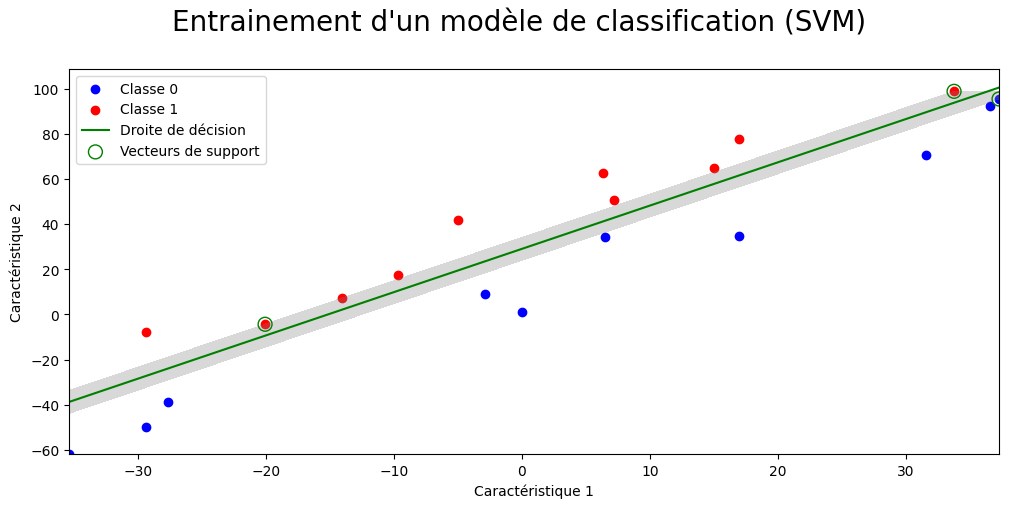

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
clf = SVC(kernel="linear").fit(X_train, y_train)
afficher_graphique(
    X_train, y_train,
    const=clf.intercept_, coef0=clf.coef_[0][0], coef1=clf.coef_[0][1],
    svm=clf, support=clf.support_vectors_,
)

## 💻 Code à compléter

**Objectif :**

Calculer les **métriques de classification** et la **matrice de confusion** sur le jeu d'entrainement et de test

**Etapes :**

- Afficher le **rapport de classification** pour le **jeu d'entrainement** à l'aide de la fonction `classification_report()` et analyser le résultat
- Afficher la **matrice de confusion** pour le **jeu d'entrainement** à l'aide de la fonction `ConfusionMatrixDisplay()` et analyser le résultat
- Même chose pour le jeu de test

**Ressources à utiliser :**

Lien vers la documentation :

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

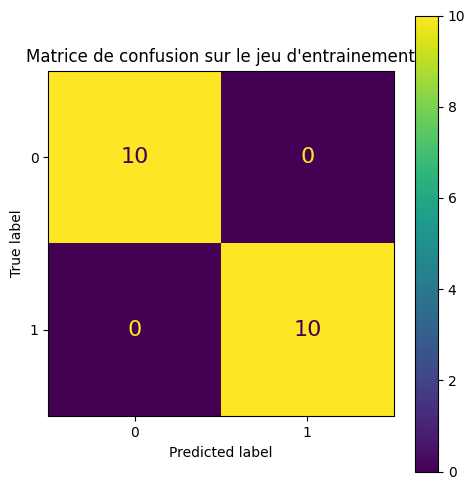

Rapport de classification sur le jeu d'entrainement :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [8]:
# Prédictions pour les données d'entrainement et de test
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Matrice de confusion pour les données d'entraînement
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp_train.plot(ax=ax, values_format='d')
ax.set_title("Matrice de confusion sur le jeu d'entrainement")
for texts in disp_train.text_.ravel():
    texts.set_fontsize(16)
plt.tight_layout()
plt.show()
# Rapport de classification pour les données d'entraînement
report_train = classification_report(y_train, y_train_pred, target_names=[str(cl) for cl in clf.classes_])
print("Rapport de classification sur le jeu d'entrainement :\n", report_train)


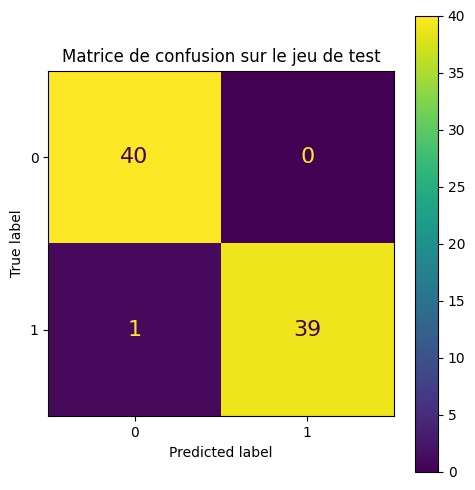

Rapport de classification sur le jeu de test :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.97      0.99        40

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Matrice de confusion pour les données de test
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp_test.plot(ax=ax, values_format='d')
ax.set_title("Matrice de confusion sur le jeu de test")
for texts in disp_test.text_.ravel():
    texts.set_fontsize(16)
plt.tight_layout()
plt.show()
# Rapport de classification pour les données de test
report_test = classification_report(y_test, y_test_pred, target_names=[str(cl) for cl in clf.classes_])
print("Rapport de classification sur le jeu de test :\n", report_test)

▶️ **Exécuter le code** de la fonction d'affichage des graphiques animés

In [10]:
def creer_image(X_train, X_test, y_train, y_test):
    clf = SVC(kernel="linear").fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    # Calcul de la droite de décision
    x_values = np.array([X[:, 0].min(), X[:, 0].max()])
    y_values = -(clf.intercept_ + clf.coef_[0][0] * x_values) / clf.coef_[0][1]
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    ax[0].scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], alpha=0.5, color='#0000ff', label='Classe 0 (entrainement)')
    ax[0].scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], alpha=0.5, color='#ff0000', label='Classe 1 (entrainement)')
    ax[0].plot(x_values, y_values, 'g-', label='Droite de décision')
    ax[0].scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], alpha=0.5, color='#7F7FD6', label='Classe 0 (test)')
    ax[0].scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], alpha=0.5, color='#CA887A', label='Classe 1 (test)')
    ax[0].set_xlabel("Caractéristique 1")
    ax[0].set_ylabel("Caractéristique 2")
    ax[0].legend()
    # Matrice de confusion d'entrainement
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
    disp_train.plot(ax=ax[1], values_format='d')
    ax[1].set_title("Matrice de confusion d'entrainement")
    for texts in disp_train.text_.ravel():
        texts.set_fontsize(16)
    # Matrice de confusion de test
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
    disp_test.plot(ax=ax[2], values_format='d')
    ax[2].set_title("Matrice de confusion de test")
    for texts in disp_test.text_.ravel():
        texts.set_fontsize(16)
    fig.suptitle(f"Entrainement d'un modèle de classification (SVM) {round(len(y_test)/(len(y_test)+len(y_train))*100, 2)}% test", fontsize=20, y=1)
    # Transformation de l'image sous forme de tableau Numpy
    canvas = plt.get_current_fig_manager().canvas
    canvas.draw()
    width, height = canvas.get_width_height()
    image_str = canvas.buffer_rgba()
    image_np = np.frombuffer(image_str, dtype=np.uint8).reshape(height, width, 4)
    plt.close(fig)
    return image_np

## 💻 Code à compléter

**Objectif :**

Faire **varier la proportion des données** entre jeu de données d'entrainement et de test entre 5% et 95% et visualiser l'**impact sur la matrice de confusion**

**Etapes :**

- Créer une boucle `for` avec la fonction numpy `arange()` pour faire varier la proportion du jeu de test entre 10% et 90%
- Intégrer dans cette boucle la séparation entre jeu d'entrainement et de test à l'aide de la fonction `train_test_split()` de Scikit-Learn
- Générer l'image du graphique et de la matrice de confusion à l'aide de la fonction `creer_image()` et ajouter le résultat dans la liste notée `frames`

**Ressources à utiliser :**

Lien vers la documentation :

- https://numpy.org/doc/stable/reference/generated/numpy.arange.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

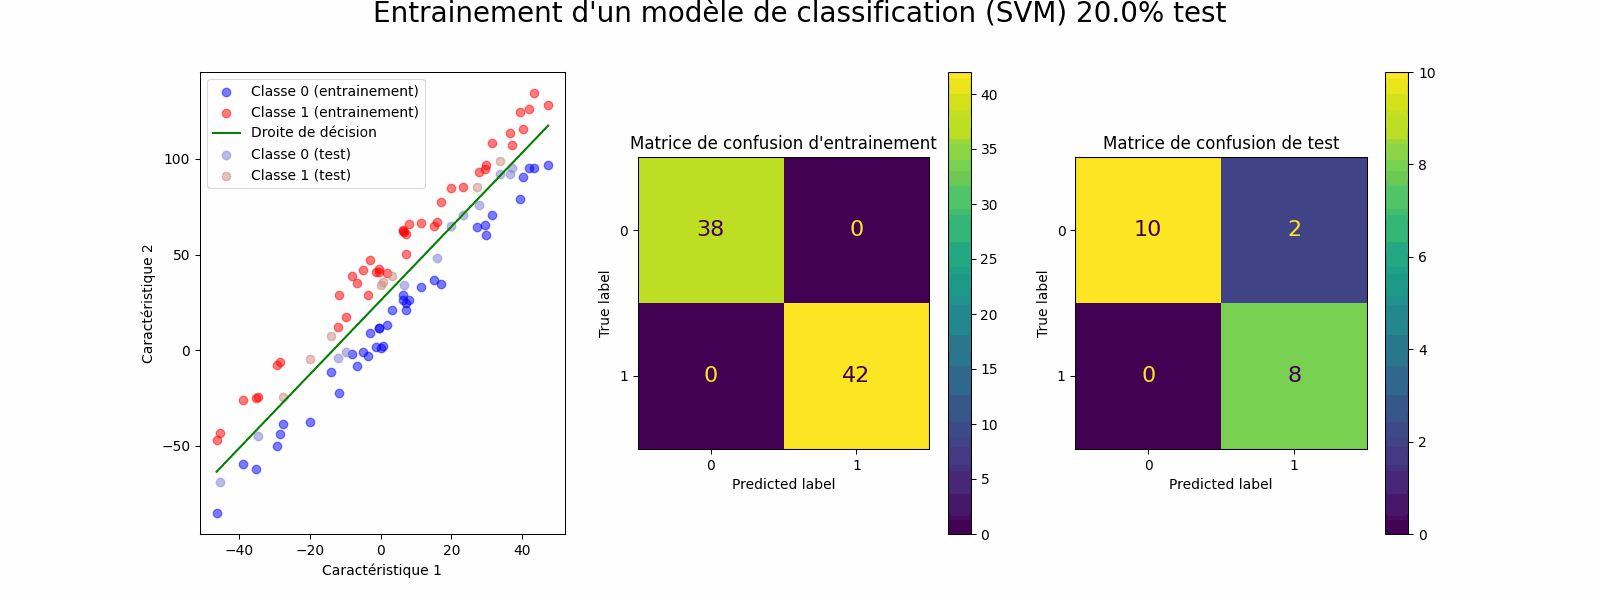

In [11]:
filename = "image.gif"
frames = []  # Liste pour stocker les images intermédiaires
for size in np.arange(0.20, 0.9, 0.01): # A COMPLETER
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=size, shuffle=False)
    intermediaire = creer_image(X_train, X_test, y_train, y_test)
    frames.append(intermediaire)

# Sauvegarde de l'animation GIF
imageio.mimsave(filename, frames,duration=500, loop=0)

# Affichage du GIF dans le notebook
display(Image(filename=filename))

▶️ **Exécuter le code** des fonctions de calcul de la justesse et d'affichage des graphiques

In [12]:
def acc(X_train, X_test, y_train, y_test):
    clf = SVC(kernel="linear").fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    # Calcul de l'accuracy
    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
    return acc_train, acc_test

def afficher_acc(acc_train, acc_test):
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0.05, 0.95, 100), acc_train, label='Justesse entrainement', color='blue')
    plt.plot(np.linspace(0.05, 0.95, 100), acc_test, label='Justesse test', color='red')
    plt.xlabel('Proportion de la taille du test')
    plt.ylabel('Justesse')
    plt.ylim((0, 1))
    plt.title("Courbes de la justesse de l'entrainement et de test")
    plt.legend()
    plt.grid(True)
    plt.show()

## 💻 Code à compléter

**Objectif :**

Faire **varier la proportion des données** entre jeu de données d'entrainement et de test entre 5% et 95% et visualiser la **courbe des métriques** de classification (justesse / accuracy) pour le jeu d'entrainement et de test

**Etapes :**

- Créer une boucle `for` avec la fonction numpy `linspace()` pour faire varier la proportion du jeu de test entre 5% et 95%
- Intégrer dans cette boucle la séparation entre jeu d'entrainement et de test à l'aide de la fonction `train_test_split()` de Scikit-Learn
- Calculer la justesse à l'aide de la fonction `acc()` et ajouter le résultat dans les listes notées `acc_train` et `acc_test`
- Afficher le résultat à l'aide de la fonction `afficher_acc()`

**Ressources à utiliser :**

Lien vers la documentation :

- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

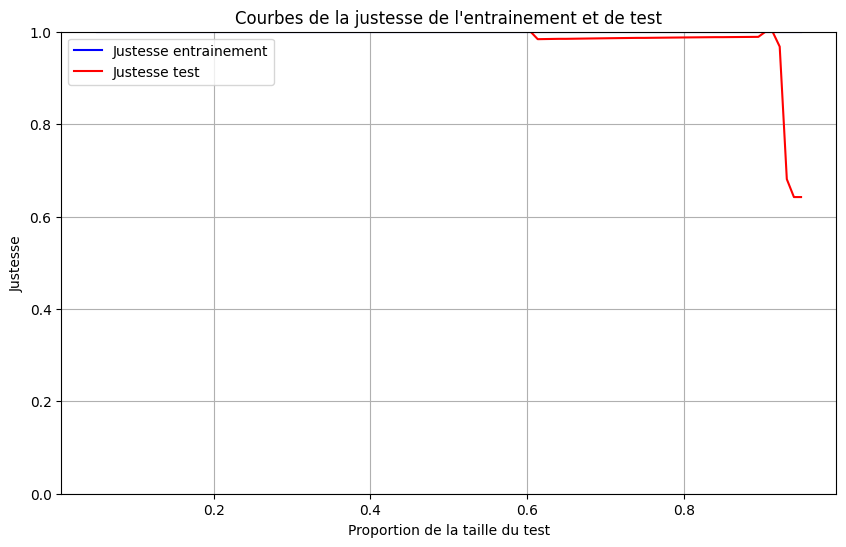

In [13]:
acc_train, acc_test = [], []
for size in np.linspace(0.05, 0.95, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    temp_train, temp_test = acc(X_train, X_test, y_train, y_test)
    acc_train.append(temp_train)
    acc_test.append(temp_test)
afficher_acc(acc_train, acc_test)